# 付録A  Pyアート

## A.1  2Dグラフィックス

### A1.1  標準ライブラリ

グラフィックス関連の標準ライブラリは以下のものがある  
- imghdr  
イメージファイルのファイルタイプを検出する  
- colorsys  
RGB、YIQ、HSV、HLSの間で色の変換を行う  

Pythonでグラフィックスを本格的に扱うならサードパーティパッケージが必要になる

### A.1.2  PILとPillow

PILはPythonで最も有名なイメージ処理ライブラリになる

In [2]:
from PIL import Image

In [26]:
img = Image.open(r".\pydata\catlogo.png")

In [4]:
img.format

'PNG'

In [5]:
img.size

(100, 95)

In [6]:
img.mode

'RGBA'

画像を扱うならPILパッケージからImageモジュールをインポートする  
Imageモジュールの open 関数に画像のファイル名を渡すことでImageオブジェクトを作成できる  
Imageオブジェクトのformat(ファイル形式)、size、mode(色の表現法)アトリビュートを呼ぶことで画像の情報を知ることができる  

In [7]:
img.show()

Imageオブジェクトの show メソッドを呼び出すと画像を別のアプリで開くことができる

In [11]:
half_1 = (0, 0, 50, 95)
half_2 = (50, 0, 100, 95)

In [12]:
half_img_1 = img.crop(half_1)
half_img_2 = img.crop(half_2)

In [13]:
half_img_1.show()
half_img_2.show()

In [15]:
half_img_1.save(r".\pydata\half_cat1.png")
half_img_2.save(r".\pydata\half_cat2.png")

imageオブジェクトの crop メソッドにx座標とy座標の範囲をタプルにして渡すことで、画像を切り取ってImageオブジェクトを新たに作成してくれる  
Imageオブジェクトの save メソッドにファイル名を渡すことで保存することができる

In [16]:
heart_img = Image.open(r".\pydata\heart.jpg")

In [17]:
heart_img.size

(1500, 1500)

In [18]:
heart_resize_img = heart_img.resize((30, 30))

In [19]:
heart_resize_img.size

(30, 30)

In [27]:
img.paste(heart_resize_img, (20, 10))

In [28]:
img.show()

Imageオブジェクトの resize メソッドで画像のサイズを変更することができる  
Imageオブジェクトの paste メソッドに、貼り付ける画像のImageオブジェクトとxyの座標のタプルを渡すことで、画像に別の画像を貼り付けることができる 

### A.1.3  ImageMagick

ImgageMagickは、2Dビットマップイメージを変換、修正、表示するプログラムを集めたものになる  
`$ pip install wand`でインストールして、更に https://imagemagick.org/script/download.php#windows でImageMagickをインストールする必要がある

In [29]:
from wand.image import Image
from wand.display import display

In [33]:
img = Image(filename=r".\pydata\catlogo.png")

In [34]:
img.size

(100, 95)

In [35]:
img.format

'PNG'

In [36]:
display(img)

wandパッケージの image モジュールの Image 関数のキーワード引数filenameにファイル名を渡すことでImageオブジェクトを作成できて、PILの時と同じようにに扱うことができる  
wandパッケージの display モジュールの display 関数にImageオブジェクトを渡すことでImageMagickアプリで画像を開いてくれる

PILもImageMagickも、回転、テキストや直線の描画、イメージタイプの変更などのいろいろな機能がある

## A.2  GUI(グラフィカル・ユーザー・インタフェース)

GUIを扱えるPython標準ライブラリは Tkinter がある  
すべてのプラットフォームで動作し、ネイティブな感じのウィンドウとウィジェットを作ることができる

In [37]:
import tkinter
from PIL import Image, ImageTk

In [38]:
main = tkinter.Tk()

In [39]:
img = Image.open(r".\pydata\catlogo.png")

In [40]:
tkimg = ImageTk.PhotoImage(img)

In [41]:
tkinter.Label(main, image=tkimg).pack()

In [42]:
main.mainloop()

上のコードは画像をウィンドウに表示するごく簡単なプログラムになる  
まず tkinter モジュールと PIL パッケージの Image モジュールと ImageTk モジュールをインポートする  
tkinterモジュールの Tk 関数を呼び出して、tkinter オブジェクトを作成する  
ImageTkモジュールの PhotoImage 関数にImageオブジェクトを渡して ImageTk オブジェクトを作成する  
tkiterモジュールの Label 関数に、tkinterオブジェクトとキーワード引数のimageにImageTkオブジェクトを渡して、labelオブジェクトを作成する  
そのlabelオブジェクトの pack メソッドを呼び出し、labelオブジェクトの内容をtkinterオブジェクトに入れる  
tkinterオブジェクトの mainloop メソッドを呼び出して、ウィンドウを表示

外部ライブラリのGUIとしては以下のものがある  
- Qt  
Qtはプロ用のGUI、アプリケーションツールキットで、Google Earth、Maya、Skypeなどのアプリケーション構築に使われてきた  
Pythonで使えるQtライブラリとしては、Pyside(無料)、PyQt(GPLか商用ライセンス)がある  
- GTK+  
GTK+はQtのライバルで、GIMP、LinuxのGnomeデスクトップなどのアプリケーションの開発に使われている  
PythonバインディングはPyGTKで、コードはPyGTKサイトでダウンロードできる  
- WxPython  
WxWidgetsへのPythonバインディングで、機能が豊かなうえ、無料でダウンロードできる  
- Kivy  
Kivyは、デスクトップ、モバイルの様々なプラットフォームに対応したマルチメディアユーザーインタフェースを作れる無料のライブラリになる  
マルチタッチサポートも含まれている  
- ウェブ  
Qtなどのフレームワークはネイティブコンポーネントを使うが、ウェブを使うものもある  
ウェブはユニバーサルなGUIであり、グラフィックス(SVG)、テキスト(HTML)にマルチメディア(HTML5)も持っている  
Pythonで書かれたWebベースGUIツールとしては、RCTK、Muntjacなどがある  
フロントエンド、バックエンドツールを自由に組み合わせてウェブアプリケーションを作れる

## A.3  3Dグラフィックスとアニメーション

Pythonで3D、アニメーション、マルチメディア、ゲームを試してみたいなら、Panda3Dを使うとよい

コマンドプロンプトで`$ cd Panda3D\samples\ball-in-maze`でカレントディレクトリを移動し、`$ python main.py`を実行すると簡単な3Dゲームをすることができる

In [43]:
from direct.showbase.ShowBase import ShowBase

class MyApp(ShowBase):
    def __init__(self):
        ShowBase.__init__(self)
        # 環境モデルをロードする
        self.environ = self.loader.loadModel("models/environment")
        # レンダリングのために親を変更する
        self.environ.reparentTo(self.render)
        # モデルに対して、スケーリングと位置変更を行う
        self.environ.setScale(0.25,0.25,0.25)
        self.environ.setPos(-8,42,0)
        
app = MyApp()
app.run()

SystemExit: 

C:\Users\kumak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


上のコードを実行すると3Dグラフィックを表示できる

以下のライブラリは、Pythonで使えるほかの3Dパッケージになる  
- Blender  
Blenderは、フリーの3Dアニメーション、ゲーム作成システム　　
- Maya  
商用の3Dアニメージョン、グラフィックスシステム  
- Houdini  
Houdiniは商用ソフトウェアだが、Apprenticeというフリーバージョンをダウンロードできる

## A.4  プロット、グラフ、ビジュアライゼーション

### A.4.1  matplotlib

matplotlibはフリーの2Dプロットライブラリで、NumPyなどの化学アプリケーションと強い結びつきがある

In [44]:
import matplotlib.pyplot as plot
import matplotlib.image as image

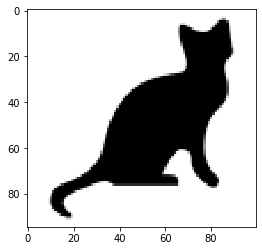

In [45]:
img = image.imread(r".\pydata\catlogo.png")
plot.imshow(img)
plot.show()

上のコードは画像をグラフに表示するコードになる

### A.4.2  bokeh

bokehはPythonの強み(大規模なデータセット、使いやすさ)とJavaScriptの強み(対話性、グラフィックスのレイテンシの低さ)を組み合わせている

## A.5  ゲーム

Pythonゲームプラットフォームとして最も有名なのはpygameになる

### A.6  サウンドと音楽

標準ライブラリは、マルチメディアサービスのなかにごく初歩的なオーディオモジュールを用意している  
音楽を作るときには以下のサードパ－ティーモージュールを使うとよい  
- pyknon  
- mingus
- remix
- sebastian
- Piano  
次のリストライブラリは、コレクションの整理やミュージックデータへのアクセスに役立つ  
- Beets
- Echonest API
- Monstermash
- Shiva
- MPD Album Art Grabber

# 付録B  ビジネス現場のPy

ビジネスではデータベース、ウェブ、システム、ネットワークなど、すべてのテクノロジーを使う  
ビジネスの現場で以下のものを使うことで、従来よりも早く、安価に柔軟なアプリケーションを作ることができる  
- Pythonのような動的言語  
- 普遍的なGUIとしてのウェブ  
- 言語に依存しないサービスインターフェースとしてのRESTfulなAPI  
- リレーショナルデータベースとNoSQLデータベース  
- 「ビッグデータ」とアナリティクス  
- デプロイと投資の節約のためのクラウド

## B.1  Microsoft Officeスイート

PythonにはMicrosoft Officeに関連して役に立つライブラリがある  
以下に示すのはMicrosoft Officeドキュメントを処理するライブラリになる  
- docx  
Microsoft Office Word 2007の.docxファイルを作ったり、読み書きしたりすることができる  
- python-excel  
xlrd、xlwt、xlutilsモジュール  
- oletools  
Office形式のデータを抽出するライブラリ

以下のモジュールは、Windowsアプリケーションの操作を自動化する  
- pywin32  
多くの
しかし、Python2に限定される  
- pywinauto  
これもWindowsアプリケーションをオートーメーションで実行する  
Python2に制限されている  
- swapy  
ネイティブコントロールからpywinauto用Pythonコードを生成する  

OpenOfficeは、オープンソースのOffice代替製品でOffice形式を読み書きできる  
PyUNOライブラリを組み込んだPythonを使えば、OpenOfficeをプログラミングできる  

## B.2  ビジネスタスクの遂行

ビジネスタスク関連では、以下のモジュールに目を引かれるかもしれない  
- fedex または UPS を介した出荷  
- stamps.com API によるメール  
- Python for business intelligence の議論  
- Cubes は、OLAPウェブサーバー、データブラウザ  
- OpenERPは、PythonとJavaScriptで書かれた大規模な商用ERPシステムで、数千のアドオンモジュールがある

## B.3.1  抽出、変換、ロード

In [46]:
zoo_list=\
[["animal","bites","stitches","hush"],
 ["bear",1,35,300],
 ["marmoset",1,2,250],
 ["bear",2,45,500],
 ["elk",1,30,100],
 ["wease",4,7,50],
 ["duck",2,0,10]]

In [47]:
import csv
with open(r".\pydata\zoo.csv","w",newline="") as f:
    writer = csv.writer(f)
    for zoo in zoo_list:
        writer.writerow(zoo)

In [48]:
import csv
from collections import Counter

counts = Counter()
with open(r".\pydata\zoo.csv","r") as f:
    reader = csv.reader(f)
    for num, row in enumerate(reader):
        if num > 0:
            counts[row[0]] += int(row[-1])
for animal, hush in counts.items():
    print(f"{str(animal).rjust(10)}{str(hush).rjust(10)}")

      bear       800
  marmoset       250
       elk       100
     wease        50
      duck        10


## B.3.2  その他の情報源

外部で作られたデータが必要になることがあるデータソースとしては以下のようなものがある  
- data.gov  
数千のデータセットとツールへのゲートウェイ  
APIは、Pythonデータ管理システムのCKANを基礎として作られている  
- Opening government with Python  
ビデオとスライド  
- python-sunlight  
Sumlight APIにアクセスするためのライブラリ  
- froide  
自由な情報リクエストのためのDjangoベースのプラットフォーム  
- 30 places to find open data on the Web  
便利なリンク集

## B.4  金融界のPython

以下のような金融界ツールがある  
- Quantitative economics  
計量経済学的なモデリングのためのツールで、数学、Pythonコードが多数含まれている  
- Python for finance  
サイト  
- Quantopian  
独自のPythonコードを書き、株価の履歴データに対して実行し、結果を見れる対話的ウェブサイト  
- PyAlgoTrade  
株式関連の戦略、モデルなどのテストに使え、ローカルコンピュータで実行する  
- Quandl  
数百万の金融データセットの検索  
- Ultra-finance  
株式関連の情報収集ライブラリ  
- Python for Finance  
金融モデリングのためのPythonサンプルが含まれている

## B.5  ビジネスデータのセキュリティ

ビジネスではセキュリティの確保が重要になる  
以下ではPythonに関連して知っておくべきことを簡単にまとめておく  
- Scrapy ではパケット精査するためのPythonをベースとする言語で、ネットワークに対する大きな攻撃を説明するために使われる  
- Python Securityサイトではセキュリティ関連の議論、一部のPythonモジュールについての詳細、早見表が含まれている  
- TJ はPythonとコンピュータのセキュリティを包括的に扱っている

## B.6  マップ

Pythonは地図の作成を得意としている  

### B.6.1  ファイル形式

マッピングの世界には、ベクトル(線)、ラスター(イメージ)、メタデータ(文字列)、それらの組み合わせなど、様々なファイル形式がある  
シェープファイル形式というものは、複数のファイル形式から構成されており、少なくとも以下のものがある  
- shp  
「シェープ」(ベクトル)情報  
- shx  
シェープインデックス  
- dbf  
属性データベース

Pythonの役に立つシェープファイルモジュールとしては以下のようなものがある  
- pyshp は、ピュアPythonのシェープファイルライブラリである  
- shapely は、地理上の問いに答えることができる  
- fiona は、シェープファイルなどのベクトル形式ファイルを処理するOGRライブラリをラップする  
- kartograph は、サーバーまたはクライアント上でシェープファイルをSVGマップにレンダリングする  
- basemap は、matplotlibを使って2Dデータを地図上にプロットする  
- cartopy は、matplotlibとshapelyを使って地図を描画する  

以降で使うアンプルコードを使うために　http://www.naturalearthdata.com/downloads/110m-cultural-vectors/　からデータをダウンロードして、pydata\mapに保存した

### B.6.2  地図の描画

シェープファイルを読み出すために pyshp ライブラリをインストールする

In [50]:
def display_shapefile(name, iwidth=500, iheight=500):
    import shapefile
    from PIL import Image, ImageDraw
    r = shapefile.Reader(name)
    mleft, mbottom, mright, mtop = r.bbox
    # 地図の単位
    mwidth = mright - mleft
    mheight = mtop - mbottom
    # 地図の単位をイメージの単位にマッピング
    hscale = iwidth / mwidth
    vscale = iheight / mheight
    img = Image.new("RGB", (iwidth, iheight), "white")
    draw = ImageDraw.Draw(img)
    for shape in r.shapes():
        pixels = [
            (int(iwidth - ((mright - x) * hscale)), int((mtop - y) * vscale))
            for x, y in shape.points]
        if shape.shapeType == shapefile.POLYGON:
            draw.polygon(pixels, outline="black")
        elif shape.shapeType == shapefile.POLYLINE:
            draw.line(pixels, fill="black")
    img.show()

In [51]:
display_shapefile(r".\pydata\map\ne_110m_admin_1_states_provinces.shp", 700, 700)

上のように shapefile モジュールを使うことでシェイプファイルを扱うことができる

その他のPythonマッピングソフトウェアへのリンクをまとめておく  
- basemap  
matplotlibを基礎として、地図とデータのオーバーレイを書く  
- mapnix  
Pythonバインディングを持つC++ライブラリで、ベクトル(線)とラスター(イメージ)を結合してマップを描く  
- tilemill  
mapnikを基礎とするマップデザインスタジオ  
- Vincent  
JaveScriptビジュアライゼーションツールのVegaへの変換  
- Python for ArcGIS  
ESRIの商用製品、ArcGISのためのPythonリソースへのリンク  
- Spatial analysis with python  
チュートリアル、パッケージ、ビデオへのリンク  
- Using geospatial data with python  
ビデオによるプレゼンテーション  
- So you'd like to make a map using Python  
pandas、matplotlib、shapelyなどのPythonモジュールを使って歴史的な地域の地図を作る  
- Python Geospatial Development  
mapnikなどのツールを使ったサンプルが含まれている  
- Learning Geospatial Analysis with Python  
ファイル形式やライブラリを解説し、ジオスペーシャルアルゴリズムも取り上げている

### B.6.3  アプリケーションとデータ

ジオコーディングは、住所と緯度経度を相互に変換する  
geopy、pygeocder、googlemapsなどのPythonライブラリもある  

# 付録C  科学におけるPy

## C.1  標準ライブラリでの数学と統計

### C.1.1  math関数

In [52]:
import math

In [53]:
math.pi # 円周率

3.141592653589793

In [54]:
math.e # ネイピア数

2.718281828459045

In [55]:
math.fabs(-271.1) # 絶対値

271.1

In [56]:
math.floor(98.6) # 引数以下の最大の数字

98

In [57]:
math.floor(-171.1)

-172

In [58]:
math.ceil(98.6) # 引数以上で最大の数字

99

In [59]:
math.ceil(-271.1)

-271

In [60]:
math.factorial(6) # 階乗　

720

In [61]:
math.log(math.e) # 自然関数

1.0

In [62]:
math.log(8,2) # 対数関数

3.0

In [63]:
math.pow(2,3) # 2の3乗

8.0

In [64]:
math.sqrt(25) # 平方根

5.0

In [65]:
math.hypot(3,4) # 直角三角形の斜辺の長さ

5.0

In [66]:
math.radians(180) # ラジアン

3.141592653589793

In [67]:
math.degrees(math.pi) # 角度

180.0

### C.1.2  複素数の操作

複素数はPythonの基本言語の中で完全にサポートされており、実数部と虚数部の記法も知られている

In [68]:
8j

8j

In [69]:
3+2j

(3+2j)

虚数i(Pythonのij)は、-1の平方根と定義されているので以下のような計算もできる

In [70]:
1j * 1j

(-1+0j)

In [71]:
(7 + 1j) * 1j

(-1+7j)

### C.1.3  decimalによる正確な浮動小数点計算

In [72]:
10/3

3.3333333333333335

コンピュータの浮動小数点数は2進で計算するように設計されているので、2のべき乗で表現できない数値は正確に表現できない

In [73]:
from decimal import Decimal

In [74]:
price = Decimal("19.99")
tax = Decimal("0.06")
price + (price * tax)

Decimal('21.1894')

制度を維持するために文字列として渡す

### C.1.4  fractionsによる有理数計算

Python標準のfractionsモジュールを使えば、分数を表現できる

In [75]:
from fractions import Fraction

In [76]:
Fraction(1, 3) * Fraction(2, 3) # 3分の1かけ3分の2

Fraction(2, 9)

In [77]:
Fraction(1.0/3.0)

Fraction(6004799503160661, 18014398509481984)

In [78]:
Fraction(Decimal("1.0") / Decimal("3.0"))

Fraction(3333333333333333333333333333, 10000000000000000000000000000)

Fractionだと不正確な時があるので、Fractionの中でDecimalを使うことで正確にできる

In [79]:
from fractions import gcd

In [80]:
gcd(24, 16) # 最大公約数 math.gcdでも同じことができる

C:\Users\kumak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  """Entry point for launching an IPython kernel.


8

### C.1.5  arrayによるパッキングされたシーケンス

リストと同じ型のシーケンスを作りたい場合は、array型を使うとよい  
リストよりもスペースを節約できながらもメソッドの多くはサポートされる  
array(typecode, initializer)という形式で作る  
typecodeは、intやfloatなどのデータ型を指定する  
オプションのinitializerは初期値を指定するもので、リスト、文字列、イテラブルを指定できる

### C.1.6  statisticsによる単純な統計

標準モジュールのstatisticsは平均、中央列、最頻値、標準偏差、分散のなどの関数が含まれている  
引数はさまざまな数値型のシーケンスかイテレータになる

### C.1.7  行列の乗算

@がデコレータだけではなく、行列の乗算の為にも使われる

## C.2  Scientific Python

Scientific Pythonディストリビューションの一部としてすべてのパッケージをまとめてダウンロードするといい  
以下が主な選択肢になる  
- Anaconda  
フリーで幅が広く、既存のPythonシステムを壊さない  
- Enthought  
フリーバージョンと商用バージョンがある  
- Python(x,y)  
Windows専用のリリース  
- Pyzo  
Anacondaに踏まれているツールにほかのツールを加えたものから作られている  
- ALGORETE  
Anacondaを基礎としてほかのツールを追加している

## C.3  NumPy

NumPyは、科学者の間でPythonが人気を集めている大きな理由のひとつで、FORTRANのような科学言語と同じように高速な多次元数値配列を提供するために作られた  
NumPy配列にはさまざまな作り方がある

### C.3.1  arrayによる配列の作成

In [81]:
import numpy as np

In [82]:
b = np.array([2,4,6,8])
b

array([2, 4, 6, 8])

In [83]:
b.ndim # 次元数

1

In [84]:
b.size # 値の総数

4

In [85]:
b.shape # 次元ごとの値の数

(4,)

### C.3.2  arangeによる配列の作成

In [86]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
a = np.arange(7,11)
a

array([ 7,  8,  9, 10])

In [88]:
a = np.arange(7,11,2)
a

array([7, 9])

In [89]:
f = np.arange(2.0,9.8,0.3)
f

array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. , 5.3, 5.6,
       5.9, 6.2, 6.5, 6.8, 7.1, 7.4, 7.7, 8. , 8.3, 8.6, 8.9, 9.2, 9.5,
       9.8])

In [90]:
g = np.arange(10,4,-1.5,dtype=np.float) # dtypeで型を指定
g

array([10. ,  8.5,  7. ,  5.5])

### C.3.3  zeros、ones、randomによる配列の作成

In [91]:
a = np.zeros((3,))
a

array([0., 0., 0.])

In [92]:
b = np.zeros((2,4))
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [93]:
b.shape

(2, 4)

In [94]:
k = np.ones((3,5))
k

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [95]:
m = np.random.random((3,5))
m

array([[0.62596767, 0.32869476, 0.30520355, 0.00805559, 0.47156609],
       [0.04510052, 0.6957636 , 0.50580637, 0.60441405, 0.13659115],
       [0.9308501 , 0.80275125, 0.98365807, 0.77723515, 0.47416854]])

### C.3.4  reshapeによる配置形状の変更

In [96]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
a = a.reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [98]:
a.ndim

2

In [99]:
a.shape = (5,2)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

### C.3.5  [ ]による要素の取得

In [100]:
a = np.arange(10)
a[7]

7

In [101]:
a[-1]

9

In [102]:
a.shape = (2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [103]:
a[1,2]

7

In [104]:
a[1][2]

7

In [105]:
a[0,2:]

array([2, 3, 4])

In [106]:
a[-1,:3]

array([5, 6, 7])

In [107]:
a[:,2:4]

array([[2, 3],
       [7, 8]])

In [108]:
a[:,2:4] = 10
a

array([[ 0,  1, 10, 10,  4],
       [ 5,  6, 10, 10,  9]])

### C.3.6  配列の数学演算

In [109]:
from numpy import *

In [110]:
a = arange(4)
a

array([0, 1, 2, 3])

In [111]:
a *= 3
a

array([0, 3, 6, 9])

In [112]:
a = zeros((2,5)) + 17.0
a

array([[17., 17., 17., 17., 17.],
       [17., 17., 17., 17., 17.]])

### C.3.7  線形代数

In [113]:
import numpy as np

In [114]:
coefficients = np.array([[4, 5],[1, 2]])

In [115]:
dependents = np.array([20, 13])

In [116]:
answers = np.linalg.solve(coefficients, dependents)
answers

array([-8.33333333, 10.66666667])

上の計算は 4x + 5y = 20 と x + 2y = 13 のxとyを求める計算になる

In [117]:
4 * answers[0] + 5 * answers[1]

20.0

In [118]:
answers[0] + 2 * answers[1]

13.0

In [119]:
product = np.dot(coefficients, answers)
product

array([20., 13.])

numpyのdotを使うと確かめ算を簡単にできる

In [120]:
np.allclose(product, dependents)

True

numpyのallcloseを使えば二つの配列がほぼ等しいかがわかる

## C.4  SciPyライブラリ

NumPyを基礎として作られたSciPyというライブラリには、さらに多くの数学、統計関数が含まれている  
SciPyのダウンロードパッケージには、NumPy、SciPy、Pandas、その他のライブラリが含まれている  
次のようなタスクが含まれている  
- 最適化
- 統計
- 補間
- 線形回帰
- 積分
- 画像処理
- 信号処理

## C.5  SciKitライブラリ

SciPyを基礎とする科学パッケージのグループで、専門分野は機械学習になる  
モデリング、分類、クラスタリング、その他のさまざまなアルゴリズムをサポートしている

## C.6  IPythonライブラリ

IPythonの良い点は  
- 改良されたインタープリタ
- ウェブベースのノートブックにコード、グラフ、テキスト、その他を埋め込んで公開できる
- 並列コンピューティングをサポートする

## C.7  Pandas

Pandasは、対話的データ分析のための新しいパッケージになる  
Pandasは、NumPyの行列演算とスプレッドシートやリレーショナルデータベースの処理を結合し、現実の世界のデータを操作するときに特に役に立つ  
NumPyは同じ型の多次元データセットを操作することが多い伝統的な科学計算に向いている  
Pandasはグループ内の複数のデータ型を処理し、データベースエディタに近い

PandasはDataFrameという基本データ構造を定義していて、これは名前と型のある列の順序だったコレクションだ  
DataFrameは、データベースのテーブル、Pythonの名前付きタプル、Pythonのネストされた辞書に似ているところがある  
その目的は、科学のみならず、ビジネスでも見かけることになりそうなタイプのデータ処理を単純化することだ  
この分野で最も広く使われている対抗製品はスプレッドシートになる  
Pandasは、現実の世界にあるきれいとは言えないデータのためのETLツールである  
分割、結合、拡張、設定、変換、形状設定、スライシング、ファイルの読み書きをすることができる  
NumPy、SciPy、IPythonと一体となって統計計算、モデルへのデータのはめ込み、グラフの描画、パブッリシングなどを行う

## C.8  Pythonと科学分野

特定分野を対象するソフトウェア、ドキュメントを以下にまとめる

### C.8.0.1  全般

- 科学技術分野におけるPythonを使った計算  
- 科学者のためのPython集中コース

### C.8.0.2  物理学

- コンピュータ物理学

### C.8.0.3  生物学、医学

- 生物学者のためのPython  
- Pythonによる神経画像

Pytohnとデータ処理についての国際的なカンファレンスとしては、次のものがあ  
- PyData
- SciPy
- EuroSciPy